In [2]:
#运行文件test_gpy.py,查看GPU的配置信息
!python test_gpu.py

Support CUDA ?:  True
tensor([10.], device='cuda:0')
tensor([[ 0.2724, -0.8898, -1.2812],
        [ 1.6242, -0.4529,  0.8141]], device='cuda:0')
tensor([[10.2724,  9.1102,  8.7188],
        [11.6242,  9.5471, 10.8141]], device='cuda:0')
Support cudnn ?:  True


<h3>2.4 Numpy与Tensor</h3>

2.4.1  torch概述

In [3]:

import torch

x=torch.tensor([1,2])
y=torch.tensor([3,4])
z=x.add(y)
print(z)
print(x)
x.add_(y)
print(x)


tensor([4, 6])
tensor([1, 2])
tensor([4, 6])


2.4.2 创建tensor

In [4]:

import torch

#根据list数据生成tensor
torch.Tensor([1,2,3,4,5,6])
#根据指定形状生成tensor
torch.Tensor(2,3)
#根据给定的tensor的形状
t=torch.Tensor([[1,2,3],[4,5,6]])
#查看tensor的形状
t.size()
#shape与size()等价方式
t.shape
#根据已有形状创建tensor
torch.Tensor(t.size())


tensor([[7.4663e+35, 4.5727e-41, 7.4663e+35],
        [4.5727e-41, 4.4842e-44, 0.0000e+00]])

In [5]:
#torch.tensor与torch.Tentor的区别
import torch
t1=torch.Tensor(1)
t2=torch.tensor(1)
print("t1的值{},t1的数据类型{}".format(t1,t1.type()))
print("t2的值{},t2的数据类型{}".format(t2,t2.type()))


t1的值tensor([7.4663e+35]),t1的数据类型torch.FloatTensor
t2的值1,t2的数据类型torch.LongTensor


In [6]:
#根据一定规则，自动生成tensor的一些例子

In [7]:
import torch

#生成一个单位矩阵
torch.eye(2,2)
#自动生成全是0的矩阵
torch.zeros(2,3)
#根据规则生成数据
torch.linspace(1,10,4)
#生成满足均匀分布随机数
torch.rand(2,3)
#生成满足标准分布随机数
torch.randn(2,3)
#返回所给数据形状相同，值全为0的张量
torch.zeros_like(torch.rand(2,3))


tensor([[0., 0., 0.],
        [0., 0., 0.]])

2.4.3 修改tensor的形状

In [8]:
import torch

#生成一个形状为2x3的矩阵
x = torch.randn(2, 3)
#查看矩阵的形状
x.size()   #结果为torch.Size([2, 3])

#查看x的维度
x.dim()    #结果为2
#把x变为3x2的矩阵
x.view(3,2)
#把x展平为1维向量
y=x.view(-1)  
y.shape
#添加一个维度
z=torch.unsqueeze(y,0)
#查看z的形状
z.size()   #结果为torch.Size([1, 6])
#计算Z的元素个数
z.numel()   #结果为6


6

2.4.4 索引操作

In [268]:
import torch


#设置一个随机种子
torch.manual_seed(100) 
#生成一个形状为2x3的矩阵
x = torch.randn(2, 3)
#根据索引获取第1行，所有数据
x[0,:]
#获取最后一列数据
x[:,-1]
#生成是否大于0的Byter张量
mask=x>0
#获取大于0的值
torch.masked_select(x,mask)
#获取非0下标,即行，列索引
torch.nonzero(mask)
#获取指定索引对应的值,输出根据以下规则得到
#out[i][j] = input[index[i][j]][j]  # if dim == 0
#out[i][j] = input[i][index[i][j]]  # if dim == 1
index=torch.LongTensor([[0,1,1]])
torch.gather(x,0,index)
index=torch.LongTensor([[0,1,1],[1,1,1]])
a=torch.gather(x,1,index)
#把a的值返回到一个2x3的0矩阵中
z=torch.zeros(2,3)
z.scatter_(1,index,a)

tensor([[ 0.3607, -0.2859,  0.0000],
        [ 0.0000, -1.3833,  0.0000]])

2.4.5 广播机制

In [11]:
import torch
import numpy as np

A = np.arange(0, 40,10).reshape(4, 1)
B = np.arange(0, 3)
#把ndarray转换为Tensor
A1=torch.from_numpy(A)  #形状为4x1
B1=torch.from_numpy(B)  #形状为3
#Tensor自动实现广播
C=A1+B1
#我们可以根据广播机制，手工进行配置
#根据规则1，B1需要向A1看齐，把B变为（1,3）
B2=B1.unsqueeze(0)  #B2的形状为1x3
#使用expand函数重复数组，分别的4x3的矩阵
A2=A1.expand(4,3)
B3=B2.expand(4,3)
#然后进行相加,C1与C结果一致
C1=A2+B3
print(C1)

tensor([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]])


2.4.6 遂元操作

In [12]:
import torch

t = torch.randn(1, 3)
t1 = torch.randn(3, 1)
t2 = torch.randn(1, 3)
#t+0.1*(t1/t2)
torch.addcdiv(t, 0.1, t1, t2)
#计算sigmoid
torch.sigmoid(t)
#将t限制在[0,1]之间
torch.clamp(t,0,1)
#t+2进行就地运算
t.add_(2)


tensor([[1.4359, 2.2378, 3.2402]])

2.4.7 归并操作

In [13]:
import torch

#生成一个含6个数的向量
a=torch.linspace(0,10,6)
#使用view方法，把a变为2x3矩阵
a=a.view((2,3))
#沿y轴方向累加，即dim=0
b=a.sum(dim=0)   #b的形状为[3]
#沿y轴方向累加，即dim=0,并保留含1的维度
b=a.sum(dim=0,keepdim=True) #b的形状为[1,3]


2.4.8比较操作

In [14]:
import torch

x=torch.linspace(0,10,6).view(2,3)
#求所有元素的最大值
torch.max(x)   #结果为10
#求y轴方向的最大值
torch.max(x,dim=0)  #结果为[6,8,10]
#求最大的2个元素
torch.topk(x,1,dim=0)  #结果为[6,8,10],对应索引为tensor([[1, 1, 1]


(tensor([[ 6.,  8., 10.]]), tensor([[1, 1, 1]]))

2.4.9 矩阵操作

In [15]:
import torch

a=torch.tensor([2, 3])
b=torch.tensor([3, 4])

torch.dot(a,b)  #运行结果为18
x=torch.randint(10,(2,3))
y=torch.randint(6,(3,4))
torch.mm(x,y)
x=torch.randint(10,(2,2,3))
y=torch.randint(6,(2,3,4))
torch.bmm(x,y)


tensor([[[23, 24, 25, 20],
         [19, 11, 27, 40]],

        [[60, 45, 66, 84],
         [26,  9, 45, 47]]])

<h3>2.5 Tensor与Autograd</h3>

2.5.3 标量反向传播

In [479]:
import torch
import numpy as np

#定义输入张量x
x=torch.Tensor([2])
#初始化权重参数W,偏移量b、并设置require_grad为True，为自动求导
w=torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)
y=torch.mul(w,x)  #等价于w*x
z=torch.add(y,b)  #等价于y+b
#查看x,w，b页子节点的requite_grad属性
print("x,w,b的require_grad属性分别为：{},{},{}".format(x.requires_grad,w.requires_grad,b.requires_grad))

x,w,b的require_grad属性分别为：False,True,True


In [480]:
#查看非叶子节点的requres_grad属性,
print("y，z的requires_grad属性分别为：{},{}".format(y.requires_grad,z.requires_grad))
#因与w，b有依赖关系，故y，z的requires_grad属性也是：True,True
#查看各节点是否为叶子节点
print("x，w，b，y，z的是否为叶子节点：{},{},{},{},{}".format(x.is_leaf,w.is_leaf,b.is_leaf,y.is_leaf,z.is_leaf))
#x，w，b，y，z的是否为叶子节点：True,True,True,False,False
#查看叶子节点的grad_fn属性
print("x，w，b的grad_fn属性：{},{},{}".format(x.grad_fn,w.grad_fn,b.grad_fn))
#因x，w，b为用户创建的，为通过其他张量计算得到，故x，w，b的grad_fn属性：None,None,None
#查看非叶子节点的grad_fn属性
print("y，z的是否为叶子节点：{},{}".format(y.grad_fn,z.grad_fn))
#y，z的是否为叶子节点：<MulBackward0 object at 0x7f923e85dda0>,<AddBackward0 object at 0x7f923e85d9b0>

y，z的requires_grad属性分别为：True,True
x，w，b，y，z的是否为叶子节点：True,True,True,False,False
x，w，b的grad_fn属性：None,None,None
y，z的是否为叶子节点：<MulBackward0 object at 0x7f923e855860>,<AddBackward0 object at 0x7f923e855b00>


In [482]:
#基于z张量进行梯度反向传播,执行backward之后计算图会自动清空，
#如果需要多次使用backward，需要修改参数retain_graph为True，此时梯度是累加的
#z.backward(retain_graph=True)
z.backward()
#查看叶子节点的梯度，x是叶子节点但它无需求导，故其梯度为None
print("参数w,b的梯度分别为:{},{},{}".format(w.grad,b.grad,x.grad))
#参数w,b的梯度分别为:tensor([2.]),tensor([1.]),None

#非叶子节点的梯度，执行backward之后，会自动清空
print("非叶子节点y,z的梯度分别为:{},{}".format(y.grad,z.grad))
#非叶子节点y,z的梯度分别为:None,None

参数w,b的梯度分别为:tensor([2.]),tensor([1.]),None


In [485]:
print("非叶子节点y,z的梯度分别为:{},{}".format(y.grad,z.grad))

非叶子节点y,z的梯度分别为:None,None


2.5.4 非标量反向传播

In [472]:
backward(gradient=None, retain_graph=None, create_graph=False)

In [541]:
import torch

#定义叶子节点张量x，形状为1x2
x= torch.tensor([[2, 3]], dtype=torch.float, requires_grad=True)
#初始化Jacobian矩阵
J= torch.zeros(2 ,2)
#初始化目标张量，形状为1x2
y = torch.zeros(1, 2)
#定义y与x之间的映射关系：
#y1=x1**2+3*x2，y2=x2**2+2*x1
y[0, 0] = x[0, 0] ** 2 + 3 * x[0 ,1]
y[0, 1] = x[0, 1] ** 2 + 2 * x[0, 0]


In [542]:
#y.backward(torch.Tensor([[1, 1]]))
#print(x.grad)

In [543]:
#生成y1对x的梯度
y.backward(torch.Tensor([[1, 0]]),retain_graph=True)
J[0]=x.grad
#梯度是累加的，故需要对x的梯度清零
x.grad = torch.zeros_like(x.grad)
#生成y2对x的梯度
y.backward(torch.Tensor([[0, 1]]))
J[1]=x.grad
#显示jacobian矩阵的值
print(J)

tensor([[4., 3.],
        [2., 6.]])


<h3>2.6 使用Numpy实现机器学习</h3>

In [544]:
# -*- coding: utf-8 -*-
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt


In [545]:
np.random.seed(100) 
x = np.linspace(-1, 1, 100).reshape(100,1) 
y = 3*np.power(x, 2) +2+ 0.2*np.random.rand(x.size).reshape(100,1)  


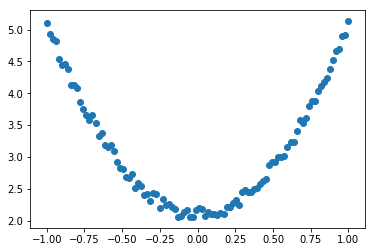

In [546]:
# 画图
plt.scatter(x, y)
plt.show()


In [547]:
# 随机初始化参数
w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1) 


In [548]:
lr =0.001 # 学习率

for i in range(800):
    # 前向传播
    y_pred = np.power(x,2)*w1 + b1
    # 定义损失函数
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    #计算梯度
    grad_w=np.sum((y_pred - y)*np.power(x,2))
    grad_b=np.sum((y_pred - y))
    #使用梯度下降法，是loss最小
    w1 -= lr * grad_w
    b1 -= lr * grad_b


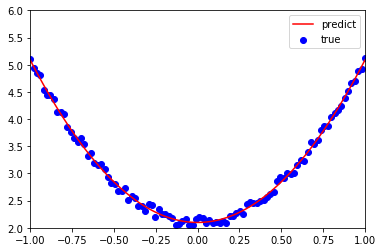

[[2.98927619]] [[2.09818307]]


In [549]:
plt.plot(x, y_pred,'r-',label='predict')
plt.scatter(x, y,color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()
print(w1,b1)


<h3>2.7 使用Tensor及antograd实现机器学习</h3>

In [550]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt


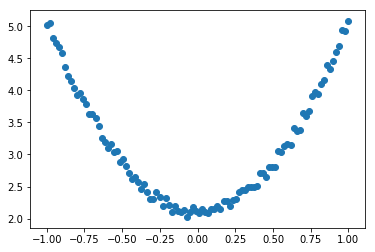

In [551]:
t.manual_seed(100) 
dtype = t.float
#生成x坐标数据，x为tenor，形状为100x1
x = t.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
#生成y坐标数据，y为tenor，形状为100x1，另加上一些噪音
y = 3*x.pow(2) +2+ 0.2*torch.rand(x.size())                 

# 画图，把tensor数据转换为numpy数据
plt.scatter(x.numpy(), y.numpy())
plt.show()


In [552]:
# 随机初始化参数，参数w，b为需要学习的，故需requires_grad=True
w = t.randn(1,1, dtype=dtype,requires_grad=True)
b = t.zeros(1,1, dtype=dtype, requires_grad=True) 


In [553]:
lr =0.001 # 学习率

for ii in range(800):
    # forward：计算loss
    y_pred = x.pow(2).mm(w) + b
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    # backward：自动计算梯度
    loss.backward()
    
    # 手动更新参数，需要用torch.no_grad()更新参数
    with t.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    
    # 梯度清零
        w.grad.zero_()
        b.grad.zero_()


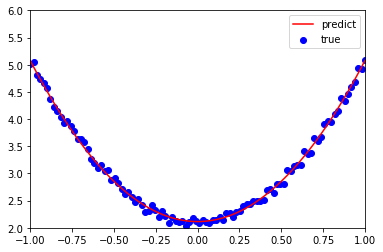

tensor([[2.9645]], requires_grad=True) tensor([[2.1146]], requires_grad=True)


In [554]:
plt.plot(x.numpy(), y_pred.detach().numpy(),'r-',label='predict')#predict
plt.scatter(x.numpy(), y.numpy(),color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()
        
print(w, b)


<h3>2.8 使用TensorFlow架构</h3>

损失值、权重、偏移量分别为8.7377,[0.73476756],[0.05745768]
损失值、权重、偏移量分别为0.0888,[2.031675],[2.422748]
损失值、权重、偏移量分别为0.0471,[2.3075912],[2.3504295]
损失值、权重、偏移量分别为0.0260,[2.4992745],[2.2797258]
损失值、权重、偏移量分别为0.0151,[2.6371691],[2.2286386]
损失值、权重、偏移量分别为0.0094,[2.73642],[2.1918662]
损失值、权重、偏移量分别为0.0065,[2.8078585],[2.1653984]
损失值、权重、偏移量分别为0.0050,[2.8592768],[2.1463478]
损失值、权重、偏移量分别为0.0042,[2.896286],[2.132636]
损失值、权重、偏移量分别为0.0038,[2.922923],[2.1227665]


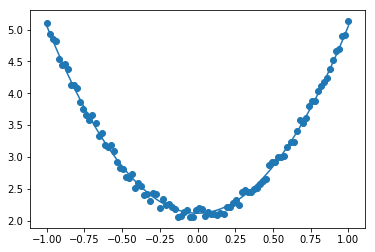

In [588]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np

#生成训练数据
np.random.seed(100) 
x = np.linspace(-1, 1, 100).reshape(100,1) 
y = 3*np.power(x, 2) +2+ 0.2*np.random.rand(x.size).reshape(100,1)  


# 创建两个占位符，分别用来存放输入数据x和目标值y
#运行计算图时，导入数据.
x1 = tf.placeholder(tf.float32, shape=(None, 1))
y1 = tf.placeholder(tf.float32, shape=(None, 1))

# 创建权重变量w和b，并用随机值初始化.
# TensorFlow 的变量在整个计算图保存其值.
w = tf.Variable(tf.random_uniform([1], 0, 1.0))
b = tf.Variable(tf.zeros([1]))


# 前向传播，计算预测值.
y_pred = np.power(x,2)*w + b

# 计算损失值
loss=tf.reduce_mean(tf.square(y-y_pred)) 

# 计算有关参数w、b关于损失函数的梯度.
grad_w, grad_b = tf.gradients(loss, [w, b])

#用梯度下降法更新参数. 
# 执行计算图时给 new_w1 和new_w2 赋值
# 对TensorFlow 来说，更新参数是计算图的一部分内容
# 而PyTorch，这部分是属于计算图之外.
learning_rate = 0.01
new_w = w.assign(w - learning_rate * grad_w)
new_b = b.assign(b - learning_rate * grad_b)

# 已构建计算图, 接下来创建TensorFlow session，准备执行计算图.
with tf.Session() as sess:
    # 执行之前需要初始化变量w、b
    sess.run(tf.global_variables_initializer())


    for step in range(2000):
        # 循环执行计算图. 每次需要把x1,y1赋给x和y.
        # 每次执行计算图时，需要计算关于new_w和new_b的损失值,
        # 返回numpy多维数组
        loss_value, v_w, v_b = sess.run([loss, new_w, new_b],
                                    feed_dict={x1: x, y1: y})
        if  step%200==0:  #每200次打印一次训练结果
            print("损失值、权重、偏移量分别为{:.4f},{},{}".format(loss_value,v_w,v_b))
# 可视化结果            
plt.figure() 
plt.scatter(x,y)
plt.plot (x, v_b + v_w*x**2)